In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

In [2]:
forestfire=pd.read_csv("forestfires.csv")
forestfire.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forestfire.shape

(517, 31)

In [4]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
forestfire[forestfire.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
forestfire1= forestfire.drop_duplicates()

In [7]:
forestfire1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
forestfire2=forestfire1.drop(forestfire1.columns[11:30],axis=1)

In [9]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [10]:
forestfire2["month"]=label.fit_transform(forestfire2["month"])
forestfire2["day"]=label.fit_transform(forestfire2["day"])
forestfire2["size_category"]=label.fit_transform(forestfire2["size_category"])

In [11]:
forestfire2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


### Visualization for identifying whether the data is normally distributed or not

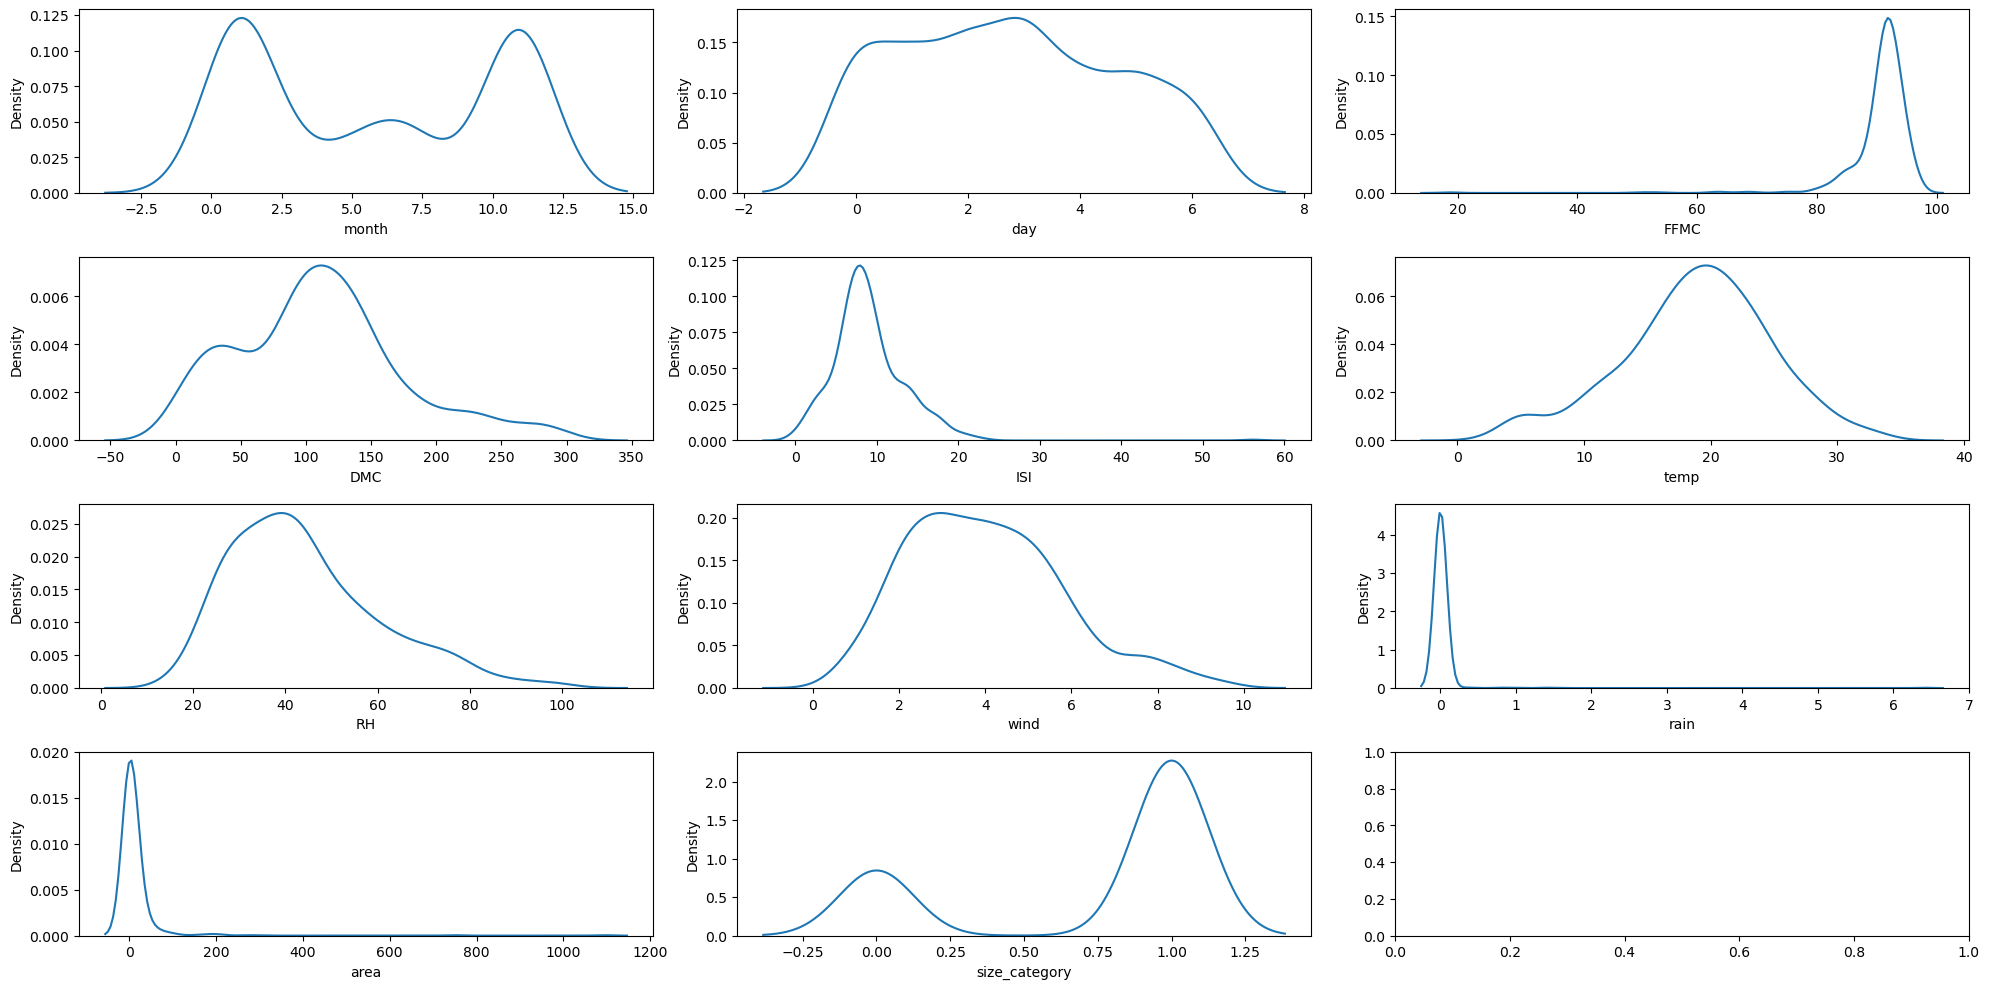

In [12]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.kdeplot(forestfire2.month,ax=ax[0,0])
sns.kdeplot(forestfire2.day,ax=ax[0,1])
sns.kdeplot(forestfire2.FFMC,ax=ax[0,2])
sns.kdeplot(forestfire2.DMC,ax=ax[1,0])
sns.kdeplot(forestfire2.ISI,ax=ax[1,1])
sns.kdeplot(forestfire2.temp,ax=ax[1,2])
sns.kdeplot(forestfire2.RH,ax=ax[2,0])
sns.kdeplot(forestfire2.wind,ax=ax[2,1])
sns.kdeplot(forestfire2.rain,ax=ax[2,2])
sns.kdeplot(forestfire2.area,ax=ax[3,0])
sns.kdeplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()

### Boxplot-To check outliers

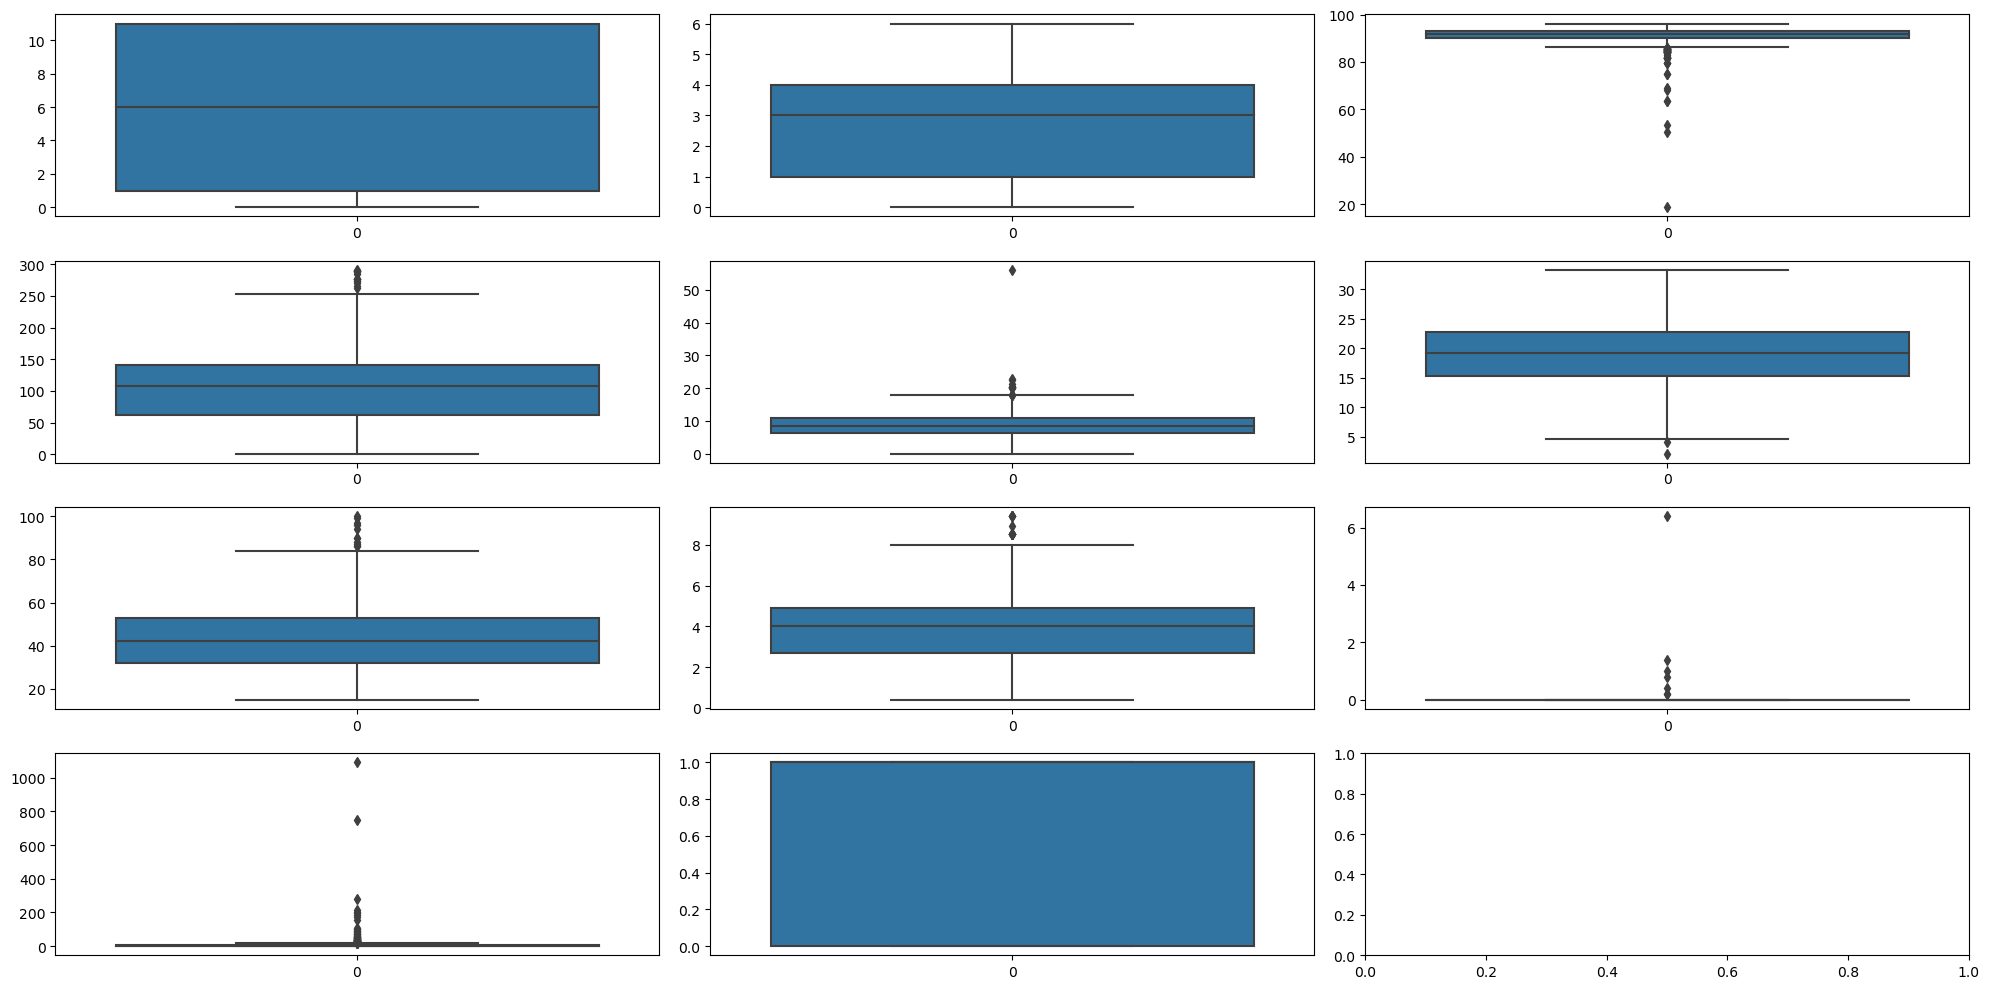

In [13]:
fig,ax=plt.subplots(4, 3, figsize=(20,10))

sns.boxplot(forestfire2.month,ax=ax[0,0])
sns.boxplot(forestfire2.day,ax=ax[0,1])
sns.boxplot(forestfire2.FFMC,ax=ax[0,2])
sns.boxplot(forestfire2.DMC,ax=ax[1,0])
sns.boxplot(forestfire2.ISI,ax=ax[1,1])
sns.boxplot(forestfire2.temp,ax=ax[1,2])
sns.boxplot(forestfire2.RH,ax=ax[2,0])
sns.boxplot(forestfire2.wind,ax=ax[2,1])
sns.boxplot(forestfire2.rain,ax=ax[2,2])
sns.boxplot(forestfire2.area,ax=ax[3,0])
sns.boxplot(forestfire2.size_category,ax=ax[3,1])

plt.tight_layout()

###  splitting the independent and target variables

In [14]:
x= forestfire2.iloc[:,:11]
y= forestfire2.iloc[:,-1]

### Constructing a Sequential neural network with
### input neurons:11neurons  
###  hidden layer :8 neurons 
### output layer:1neuron

In [15]:
model1 = Sequential()
model1.add(Dense(11,kernel_initializer='random_normal',activation='relu'))
model1.add(Dense(8,kernel_initializer='random_normal',activation='linear'))
model1.add(Dense(1,kernel_initializer='random_normal',activation='sigmoid'))

###  Compiling Model with 
### loss function: binary crossentropy
### optimizer:Adam

In [16]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Fitting 

In [17]:
model1.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7652 - loss: 0.5749 - val_accuracy: 0.6726 - val_loss: 0.6717
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 0.5934 - val_accuracy: 0.6726 - val_loss: 0.6749
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7584 - loss: 0.5415 - val_accuracy: 0.6786 - val_loss: 0.6282
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7537 - loss: 0.5534 - val_accuracy: 0.6905 - val_loss: 0.6508
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7888 - loss: 0.4945 - val_accuracy: 0.7679 - val_loss: 0.5447
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.4711 - val_accuracy: 0.7976 - val_loss: 0.4926
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.4426 - val_accuracy: 0.7798 - val_loss: 0.4608
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.3805 - val_accuracy: 0.7738 - v

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9881 - loss: 0.0376 - val_accuracy: 0.9762 - val_loss: 0.0951
Epoch 52/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9524 - val_loss: 0.0851
Epoch 53/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0119 - val_accuracy: 0.9702 - val_loss: 0.0727
Epoch 54/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0160 - val_accuracy: 0.9821 - val_loss: 0.0747
Epoch 55/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9876 - loss: 0.0280 - val_accuracy: 0.9643 - val_loss: 0.0797
Epoch 56/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0131 - val_accuracy: 0.9524 - val_loss: 0.1148
Epoch 57/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.9702 - val_loss: 0.0735
Epoch 58/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0154 - val_accuracy: 0.9702 - val_lo

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9464 - val_loss: 0.1209
Epoch 102/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9978 - loss: 0.0095 - val_accuracy: 0.9643 - val_loss: 0.0945
Epoch 103/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.9702 - val_loss: 0.0829
Epoch 104/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9992 - loss: 0.0047 - val_accuracy: 0.9583 - val_loss: 0.1085
Epoch 105/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.0354 - val_accuracy: 0.9524 - val_loss: 0.0989
Epoch 106/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.9583 - val_loss: 0.1115
Epoch 107/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.9702 - val_loss: 0.0981
Epoch 108/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9643 -

###  Model Evaluation

In [18]:
score = model1.evaluate(x,y)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.9968 - loss: 0.0113   
compile_metrics: 99.02%


In [19]:
history = model1.fit(x, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9702 - val_loss: 0.1109
Epoch 2/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9762 - val_loss: 0.1075
Epoch 3/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9643 - val_loss: 0.1235
Epoch 4/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0109 - val_accuracy: 0.9702 - val_loss: 0.1136
Epoch 5/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9702 - val_loss: 0.1193
Epoch 6/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9702 - val_loss: 0.1187
Epoch 7/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9583 - val_loss: 0.1405
Epoch 8/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9643 - v

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.5747e-04 - val_accuracy: 0.9643 - val_loss: 0.1480
Epoch 52/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9464 - val_loss: 0.1907
Epoch 53/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.9405 - val_loss: 0.1973
Epoch 54/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9909 - loss: 0.0257 - val_accuracy: 0.9226 - val_loss: 0.2160
Epoch 55/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.0263 - val_accuracy: 0.9345 - val_loss: 0.2267
Epoch 56/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9524 - val_loss: 0.1480
Epoch 57/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.0491 - val_accuracy: 0.9048 - val_loss: 0.7979
Epoch 58/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9837 - loss: 0.0547 - val_accuracy: 0.8988 - va

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9702 - val_loss: 0.1328
Epoch 102/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.6659e-04 - val_accuracy: 0.9762 - val_loss: 0.1299
Epoch 103/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9702 - val_loss: 0.1349
Epoch 104/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 5.0817e-04 - val_accuracy: 0.9702 - val_loss: 0.1368
Epoch 105/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.6175e-04 - val_accuracy: 0.9702 - val_loss: 0.1342
Epoch 106/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8613e-04 - val_accuracy: 0.9702 - val_loss: 0.1375
Epoch 107/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.6155e-04 - val_accuracy: 0.9702 - val_loss: 0.1360
Epoch 108/150
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.7671e-04 

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9643 - val_loss: 0.1093


### List all the evaulation metric in built model (history)

In [20]:
model1.history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Visualization with model accuracy for train and test data

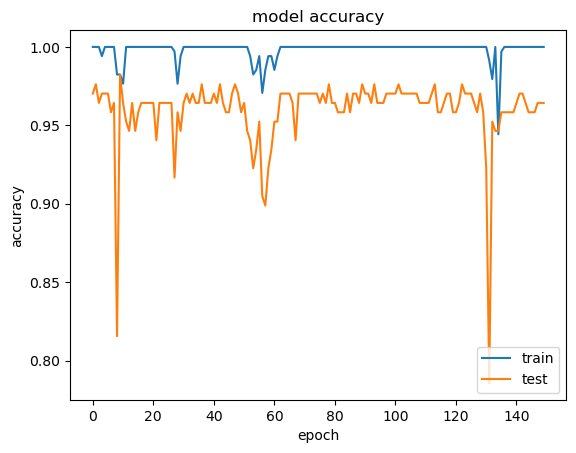

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Visualising the model history for the train and test loss

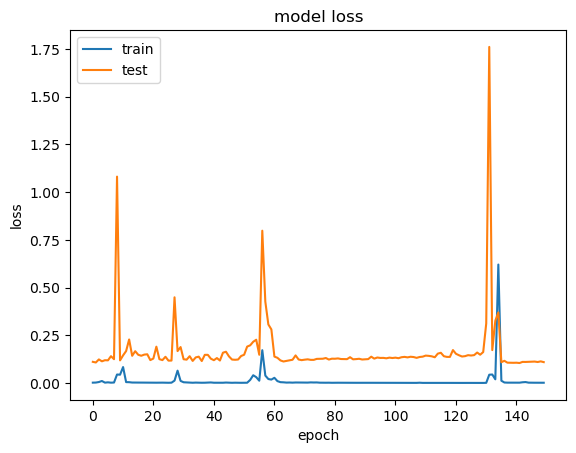

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Inference:

###  For classifying the burnt areas in forest by using neural network giving highest evaluation accuracy 95.83% and with a minimal loss of 0.1778% 